A human can express his emotions in any form, such as face, gestures, speech and text. The detection of text emotions is a content-based classification problem.

In machine learning, the detection of textual emotions is the problem of content-based classification, which is the task of natural language processing. Detecting a person’s emotions is a difficult task, but detecting the emotions using text written by a person is even more difficult as a human can express his emotions in any form.

Usually, emotions are expressed as joy, sadness, anger, surprise, hate, fear, etc. Recognizing this type of emotion from a text written by a person plays an important role in applications such as 
* chatbots, 
* customer support forum, 
* customer reviews etc. 

For detecting emotions from the text, we will perform a few steps that will start with preparing the data. Then the next step will be tokenization where the textual data will be converted into tokens and from these tokens, we have to identify the emotional words.

These emotional words will be the keyword to classify the emotions of a text. Next, we’ll frame this task in such a way that a text will be taken as an input and the emoji that represents the emotions in that text is generated as the output.

In [1]:
import re 
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
def read_data(file):
    data = []
    with open(file, 'r')as f:
        for line in f:
            line = line.strip()
            label = ' '.join(line[1:line.find("]")].strip().split())
            text = line[line.find("]")+1:].strip()
            data.append([label, text])
    return data

In [3]:
file = 'text.txt'
data = read_data(file)
"Number of instances: {}".format(len(data))

'Number of instances: 7480'

Now we will create two Python functions for tokenization and generating the features of an input sentence:

In [4]:
def ngram(token, n): 
    output = []
    for i in range(n-1, len(token)): 
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram) 
    return output

In [5]:
def create_feature(text, nrange=(1, 1)):
    text_features = [] 
    text = text.lower() 
    text_alphanum = re.sub('[^a-z0-9#]', ' ', text)
    for n in range(nrange[0], nrange[1]+1): 
        text_features += ngram(text_alphanum.split(), n)    
    text_punc = re.sub('[a-z0-9]', ' ', text)
    text_features += ngram(text_punc.split(), 1)
    return Counter(text_features)

Now we will create a Python function to store the labels, our labels will be based on emotions such as Joy, Fear, Anger, and so on:

In [6]:
def convert_label(item, name): 
    items = list(map(float, item.split()))
    label = ""
    for idx in range(len(items)): 
        if items[idx] == 1: 
            label += name[idx] + " "
    
    return label.strip()

In [7]:
emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]

X_all = []
y_all = []
for label, text in data:
    y_all.append(convert_label(label, emotions))
    X_all.append(create_feature(text, nrange=(1, 4)))

Now we will split the data into training and test sets:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 123)

In [9]:
def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    return train_acc, test_acc

In [10]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

Now we’re going to train four machine learning models and then choose the model that works best on the training and testing sets:

In [11]:
svc = SVC()
lsvc = LinearSVC(random_state=123)
rforest = RandomForestClassifier(random_state=123)
dtree = DecisionTreeClassifier()

In [12]:
clifs = [svc, lsvc, rforest, dtree]

# train and test them 
print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

| Classifier                | Training Accuracy | Test Accuracy |
| ------------------------- | ----------------- | ------------- |
| SVC                       |         0.9067513 |     0.4512032 |


C:\Users\Waqas.Ali\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


| LinearSVC                 |         0.9988302 |     0.5768717 |
| RandomForestClassifier    |         0.9988302 |     0.5541444 |
| DecisionTreeClassifier    |         0.9988302 |     0.4538770 |


### Detecting Emotion

Now, we’re going to assign an emoji to each label that is emotions in this problem, then we’ll write 4 input sentences and then we’ll use our trained machine learning model to take a look at the emotions of our input sentences:

In [13]:
l = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
l.sort()
label_freq = {}
for label, _ in data: 
    label_freq[label] = label_freq.get(label, 0) + 1

In [14]:
# print the labels and their counts in sorted order 
for l in sorted(label_freq, key=label_freq.get, reverse=True):
    print("{:10}({})  {}".format(convert_label(l, emotions), l, label_freq[l]))

joy       (1. 0. 0. 0. 0. 0. 0.)  1084
anger     (0. 0. 1. 0. 0. 0. 0.)  1080
sadness   (0. 0. 0. 1. 0. 0. 0.)  1079
fear      (0. 1. 0. 0. 0. 0. 0.)  1078
disgust   (0. 0. 0. 0. 1. 0. 0.)  1057
guilt     (0. 0. 0. 0. 0. 0. 1.)  1057
shame     (0. 0. 0. 0. 0. 1. 0.)  1045


In [15]:
emoji_dict = {"joy":"😂", "fear":"😱", "anger":"😠", "sadness":"😢", "disgust":"😒", "shame":"😳", "guilt":"😳"}
t1 = "This looks so impressive"
t2 = "I have a fear of dogs"
t3 = "My dog died yesterday"
t4 = "I don't love you anymore..!"

texts = [t1, t2, t3, t4]
for text in texts: 
    features = create_feature(text, nrange=(1, 4))
    features = vectorizer.transform(features)
    prediction = clf.predict(features)[0]
    print( text,emoji_dict[prediction])

This looks so impressive 😳
I have a fear of dogs 😱
My dog died yesterday 😢
I don't love you anymore..! 😂


The generated output is superb. This is how we can use machine learning for detecting emotions from the text. This is an important task of human-machine interactions for anyone looking for a future in natural language processing.

### End to End Model

An end to end machine learning project means to create an interactive application that runs our trained machine learning model and give output according to the user input. It follows the complete lifecycle of a machine learning model. Below are the steps that we need to follow while creating an end to end application for our model:

* Data access and collection
* Data preparation and exploration
* Model training and evaluation
* Model deployment

Creating an end to end machine learning application is important to show most of our skills in a single project.

We will be using the **streamlit framework** in python to create a web interface for interacting with the machine learning model. Here we will deploy a text emotion prediction model.

In [ ]:
import re 
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import streamlit as st
st.write("# Text Emotions Prediction")
t1 = st.text_input("Enter any text>>: ")

def read_data(file):
    data = []
    with open(file, 'r')as f:
        for line in f:
            line = line.strip()
            label = ' '.join(line[1:line.find("]")].strip().split())
            text = line[line.find("]")+1:].strip()
            data.append([label, text])
    return data

file = 'text.txt'
data = read_data(file)
print("Number of instances: {}".format(len(data)))

def ngram(token, n): 
    output = []
    for i in range(n-1, len(token)): 
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram) 
    return output

def create_feature(text, nrange=(1, 1)):
    text_features = [] 
    text = text.lower() 
    text_alphanum = re.sub('[^a-z0-9#]', ' ', text)
    for n in range(nrange[0], nrange[1]+1): 
        text_features += ngram(text_alphanum.split(), n)    
    text_punc = re.sub('[a-z0-9]', ' ', text)
    text_features += ngram(text_punc.split(), 1)
    return Counter(text_features)

print(create_feature("I love you!"))
print(create_feature(" aly wins the gold!!!"))
print(create_feature(" aly wins the gold!!!!!", (1, 2)))

def convert_label(item, name): 
    items = list(map(float, item.split()))
    label = ""
    for idx in range(len(items)): 
        if items[idx] == 1: 
            label += name[idx] + " "
    
    return label.strip()

emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]

X_all = []
y_all = []
for label, text in data:
    y_all.append(convert_label(label, emotions))
    X_all.append(create_feature(text, nrange=(1, 4)))

print("features example: ")
print(X_all[0])
print("Label example:")
print(y_all[0])

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 123)

def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    return train_acc, test_acc

from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Classifiers 
svc = SVC()
lsvc = LinearSVC(random_state=123)
rforest = RandomForestClassifier(random_state=123)
dtree = DecisionTreeClassifier()

clifs = [svc, lsvc, rforest, dtree]

# train and test them 
print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

l = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
l.sort()
label_freq = {}
for label, _ in data: 
    label_freq[label] = label_freq.get(label, 0) + 1

# print the labels and their counts in sorted order 
for l in sorted(label_freq, key=label_freq.get, reverse=True):
    print("{:10}({})  {}".format(convert_label(l, emotions), l, label_freq[l]))

emoji_dict = {"joy":"😂", "fear":"😱", "anger":"😠", "sadness":"😢", "disgust":"😒", "shame":"😳", "guilt":"😳"}

texts = [t1]
for text in texts: 
    features = create_feature(text, nrange=(1, 4))
    features = vectorizer.transform(features)
    prediction = clf.predict(features)[0]
    st.write(emoji_dict[prediction])

As we are using the streamlit framework, so we have to run this file by using the command `streamlit run filename.py` After running this file we will see a web interface that will directly open in our default browser and we will see an output like this:

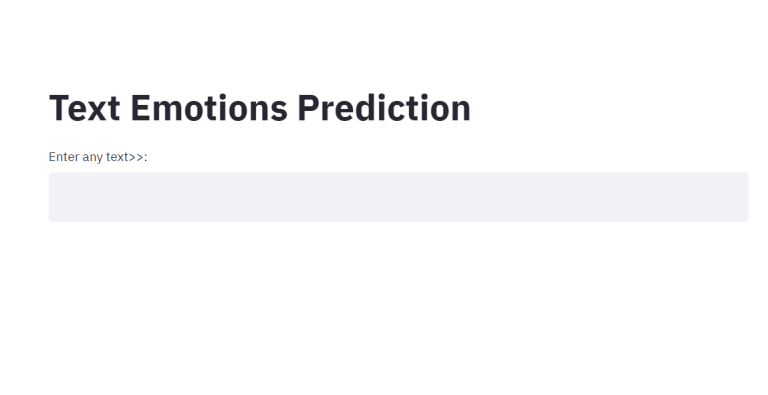

As we can see a user input, simply write a text to predict the emotion of that text and hit enter. The interface will take the same time to run as the time taken by our Python file. After executing the model on the user input it will print the emotion of the text entered by the user. This is how we can create an interactive interface for our machine learning model.

The streamlit framework offers a lot of features to make our web interface more interactive and user friendly that we can learn from the official documentation [here](https://docs.streamlit.io/).